In [254]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Before whitening transform

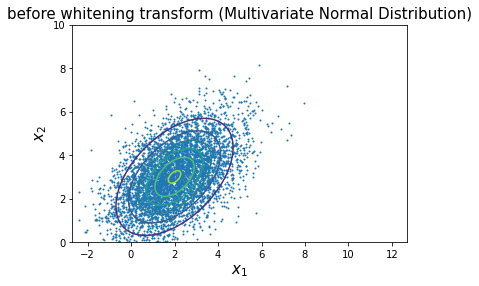

In [382]:
mu = [2, 3]
cov = [[2, 1], [1, 2]]

rv = stats.multivariate_normal(mu, cov)
X = rv.rvs(5000)

xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("$x_1$", fontsize = 15)
plt.ylabel("$x_2$", fontsize = 15)
plt.title("before whitening transform (Multivariate Normal Distribution)",  fontsize = 15)
plt.show()

---
## $\mathbf{A}_{\mathbf{w}}$ : Whitening transform Matrix

$$\mathbf{A}_{w}=\mathbf{\Phi} \Lambda^{-1 / 2}$$

### step 1 :  eigenvalue 및 eigenvector 계산

In [360]:
a = cov
w, v = np.linalg.eig(a)

print('eigen values : [{}], [{}]'.format(w[0], w[1]))
print('----------------------------')
print('eigen vectors : [{}], [{}]'.format(v[0], v[1]))

eigen values : [3.0], [1.0]
----------------------------
eigen vectors : [[ 0.70710678 -0.70710678]], [[0.70710678 0.70710678]]


### step 2 : matrix 정리

#### $\Phi$ : the matrix whose columns are the orthogonal eigenvectors of $\sum$


$$\Phi = 
\left[\begin{array}{cc}
\mathbf{v}_1 & \mathbf{v}_2 \\
\end{array}\right]
$$

In [364]:
Phi = v

In [365]:
Phi

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

#### $\Lambda$ : the diagonal matrix of the corresponding eigenvalues of $\sum$

$$\Lambda = 
\left[\begin{array}{cc}
\lambda_1 & 0 \\
0 & \lambda_2 \\
\end{array}\right]
$$

In [368]:
Lambda = np.diag(w)

In [369]:
Lambda

array([[3., 0.],
       [0., 1.]])

#### $\mathbf{A}_{w}$ : Whitening transform Matrix

$$\mathbf{A}_{w}=\mathbf{\Phi} \Lambda^{-1 / 2}$$

In [377]:
A_w = Phi @ np.linalg.inv(Lambda)**(1/2)
A_w

array([[ 0.40824829, -0.70710678],
       [ 0.40824829,  0.70710678]])

### step 3 : 기존 cov를 whitening transform 변환


$$\mathbf{A}_{w}^{T} \sum \mathbf{A}_{w}$$

In [378]:
cov_after = A_w.T @ cov @ A_w
cov_after

array([[1., 0.],
       [0., 1.]])

### 결과 시각화

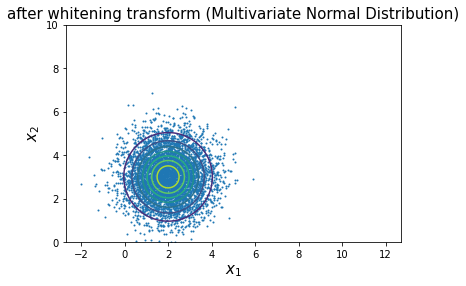

In [352]:
mu = (cov_after@np.array([2, 3])).tolist()            # 부동소수점 차이 발생 무시
cov = [cov_after[0].tolist(), cov_after[1].tolist()]  # 부동소수점 차이 발생 무시

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(5000)

xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("$x_1$", fontsize = 15)
plt.ylabel("$x_2$", fontsize = 15)
plt.title("after whitening transform (Multivariate Normal Distribution)", fontsize = 15)
plt.show()